In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM,GlobalMaxPooling1D,Input,Dropout,GRU,Bidirectional
from tensorflow.keras.models import Model
import pandas as pd
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('^NSEI.csv')
dataset.describe()
dataset = dataset.dropna()

In [5]:
series = np.array(dataset['Close']).reshape(-1,1)


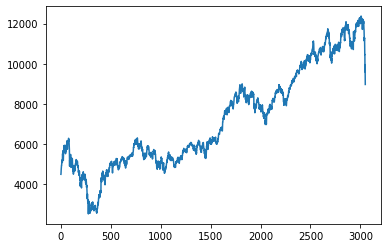

In [6]:
plt.plot(series)
plt.show()

In [7]:
from sklearn import preprocessing
import numpy as np
N = len(series)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(series)


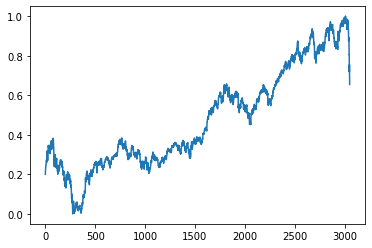

In [8]:
plt.plot(data)
plt.show()

In [9]:
T = 10
X = []
Y = []
for i in range(N-T):
    x = data[i:i+T,0]
    X.append(x)
    y = data[i+T,0]
    Y.append(y)
    
X = np.array(X).reshape(-1,T,1) #Reshape N*T*D
Y = np.array(Y).reshape(-1)
N = len(X)
X.shape,Y.shape

((3041, 10, 1), (3041,))

In [12]:
i = Input(shape=(T,1))

x = LSTM(50,return_sequences=True)(i)
x = Dropout(0.5)(x)

# x = LSTM(50,return_sequences=True)(x)
# x = Dropout(0.2)(x)

# x = LSTM(50,return_sequences=True)(x)
# x = Dropout(0.2)(x)

# x = LSTM(50,return_sequences=True)(x)
# x = Dropout(0.2)(x)

# x = LSTM(50,return_sequences=True)(x)
# x = Dropout(0.2)(x)

# x = LSTM(50,return_sequences=True)(x)
# x = Dropout(0.2)(x)

x = LSTM(50)(x)
x = Dropout(0.5)(x)

o = Dense(1,activation='linear')(x)

model = Model(i,o)
model.compile(loss='mse',optimizer=Adam(lr=0.001),metrics=['acc'])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_______________________________________________________

In [13]:
r = model.fit(X[:N//2],Y[:N//2],validation_data=(X[N//2:],Y[N//2:]),epochs=100,batch_size=32)


Train on 1520 samples, validate on 1521 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1520/1520 [==============================] - 1s 946us/sample - loss: 0.0126 - acc: 6.5789e-04 - val_loss: 0.0365 - val_acc: 6.5746e-04
Epoch 2/100
1520/1520 [==============================] - 1s 413us/sample - loss: 0.0031 - acc: 6.5789e-04 - val_loss: 0.0020 - val_acc: 6.5746e-04
Epoch 3/100
1520/1520 [==============================] - 1s 417us/sample - loss: 0.0024 - acc: 6.5789e-04 - val_loss: 7.4053e-04 - val_acc: 6.5746e-04
Epoch 4/100
1520/1520 [==============================] - 1s 418us/sample - loss: 0.0020 - acc: 6.5789e-04 - val_loss: 0.0010 - val_acc: 6.5746e-04
Epoch 5/100
1520/1520 [==============================] - 1s 447us/sample - loss: 0.0018 - acc: 6.5789e-04 - val_loss: 7.0755e-04 - val_acc: 6.5746e-04
Epoch 6/100
1520/1520 [==============================] - 1s 418us/sample - loss: 0.0017 - acc: 6.5789e-04 - val_los

1520/1520 [==============================] - 1s 437us/sample - loss: 3.5623e-04 - acc: 6.5789e-04 - val_loss: 3.9057e-04 - val_acc: 6.5746e-04
Epoch 53/100
1520/1520 [==============================] - 1s 453us/sample - loss: 3.6915e-04 - acc: 6.5789e-04 - val_loss: 0.0014 - val_acc: 6.5746e-04
Epoch 54/100
1520/1520 [==============================] - 1s 450us/sample - loss: 3.8133e-04 - acc: 6.5789e-04 - val_loss: 0.0028 - val_acc: 6.5746e-04
Epoch 55/100
1520/1520 [==============================] - 1s 433us/sample - loss: 4.0571e-04 - acc: 6.5789e-04 - val_loss: 0.0014 - val_acc: 6.5746e-04
Epoch 56/100
1520/1520 [==============================] - 1s 435us/sample - loss: 3.8483e-04 - acc: 6.5789e-04 - val_loss: 9.3434e-04 - val_acc: 6.5746e-04
Epoch 57/100
1520/1520 [==============================] - 1s 448us/sample - loss: 3.7087e-04 - acc: 6.5789e-04 - val_loss: 0.0029 - val_acc: 6.5746e-04
Epoch 58/100
1520/1520 [==============================] - 1s 437us/sample - loss: 3.8114e-04 

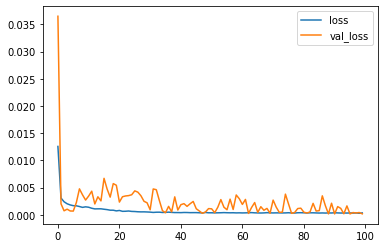

In [14]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

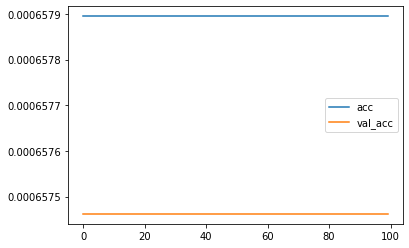

In [15]:
plt.plot(r.history['acc'],label='acc')
plt.plot(r.history['val_acc'],label='val_acc')
plt.legend()

Single prediction


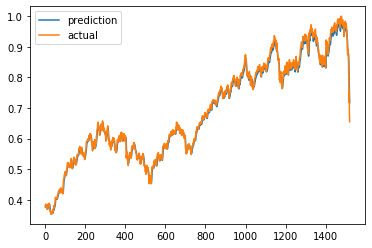

In [16]:
prediction = model.predict(X[N//2:])
actual = Y[N//2:]
plt.plot(prediction,label='prediction')
plt.plot(actual,label='actual')
plt.legend()

Continus **prediction**

In [17]:
validation_target = Y[N//2:]
predicted_target = []
last_x = X[-N//2]
while len(predicted_target) < len(validation_target):
  p = model.predict([[last_x]])[0,0]
  predicted_target.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

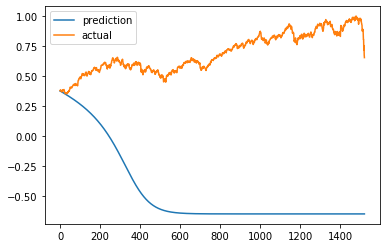

In [18]:

plt.plot(predicted_target,label='prediction')
plt.plot(validation_target,label='actual')
plt.legend()